Ingredients EDA

In [32]:
def extract_ingredients(row):
    row_values = row.tolist()
    ingredients = []
    for i in range(1, len(row_values) - 1): # First column is dish id
        current_value = str(row_values[i])
        next_value = str(row_values[i + 1])

        if current_value.startswith('ingr_'):
            if next_value not in sauces:
                ingredients.append(next_value)
    return ingredients

In [33]:
def add_unique_items(list1, list2):
    for item in list2:
        if item not in list1:
          list1.append(item)
    return list1

In [35]:
import pandas as pd
import os
from tqdm import tqdm
dirname = os.path.dirname(os.getcwd())
input_filepath = os.path.join(dirname, r"data/raw/Nutrition5kModified700.csv")
sauces_filepath = os.path.join(dirname, r"data/raw/nutrition5k_dataset_metadata_ingredients_metadata.csv")
df = pd.read_csv(input_filepath, header=None)
sauces_df = pd.read_csv(sauces_filepath)
sauces = sauces_df[sauces_df['IsSauce'] == 'Yes']
sauces = sauces['ingr'].tolist()
total_ingredients = []
for _, row in tqdm(df.iterrows(), total=len(df)):
    curr_ingredients = extract_ingredients(row)
    if len(total_ingredients) == 0:
        total_ingredients = curr_ingredients
    else:
        total_ingredients = add_unique_items(total_ingredients, curr_ingredients)

100%|██████████| 690/690 [00:00<00:00, 3224.30it/s]


There are 2267 dishes in the dataset


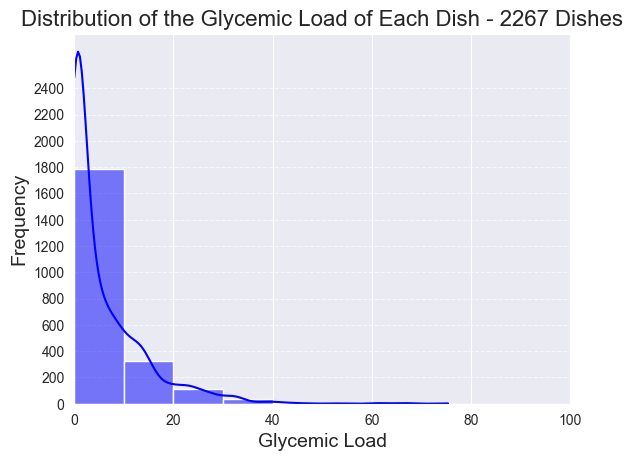

The average glycemic load is: 5.838439970783817


In [28]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

path = r"C:\Users\rotem.geva\PycharmProjects\GlycemicLoad\Portions Estimation\data\ingredients-110124.csv"
df = pd.read_csv(path)

grouped_dishes = df.groupby('Dish ID')
gl = []

print(f'There are {grouped_dishes.ngroups} dishes in the dataset')
# In the full dataset there are 4773 dishes.

for group in grouped_dishes.groups:
    gl.append(grouped_dishes.get_group(group)['Glycemic Load'].sum())

bins = np.arange(0, 101, 10)
sns.histplot(gl, kde=True, color='blue', bins=bins)
plt.title('Distribution of the Glycemic Load of Each Dish - 2267 Dishes', fontsize=16)
plt.xlabel('Glycemic Load', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim((0,100))
plt.yticks(range(0,2500, 200))
plt.show()

print(f'The average glycemic load is: {sum(gl)/len(gl)}')

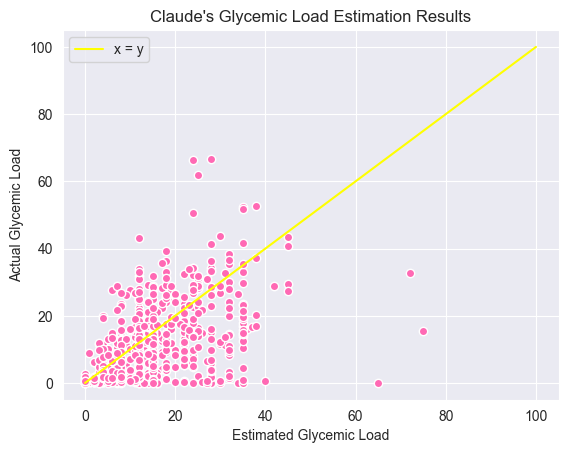

In [15]:
claude_estimation_results = r"C:\Users\rotem.geva\OneDrive - Afeka College Of Engineering\Final Project\Portions Estimation\ClaudeGlycemicLoadEstimationResults.csv"
df = pd.read_csv(claude_estimation_results)
estimated = df.iloc[:, 2]
actual = df.iloc[:, 1]
x = np.linspace(0, 100)
y = x
plt.plot(estimated, actual, 'o', markerfacecolor='hotpink',
    markeredgecolor='white',
    markeredgewidth=1.0)
plt.plot(x, y, label="x = y", color="yellow")
plt.title("Claude's Glycemic Load Estimation Results")
plt.xlabel("Estimated Glycemic Load")
plt.ylabel("Actual Glycemic Load")
plt.legend()